In [1]:
#### Analysis beer competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare
from matplotlib import pyplot
from linares_plot import *

#### Load data

In [2]:
df=pd.read_excel('results.xlsx')
df.subj.unique()

array(['lluis', 'anna', 'tiffany', 'pablo', 'gizem', 'dani', 'alba',
       'pablo_a', 'laura', 'dave', 'pili', 'pedro', 'uns', 'unp', 'marc',
       'raquel', 'paula'], dtype=object)

## 1 Question: Are we consistent blind - seen?
#### (subjet and group level)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


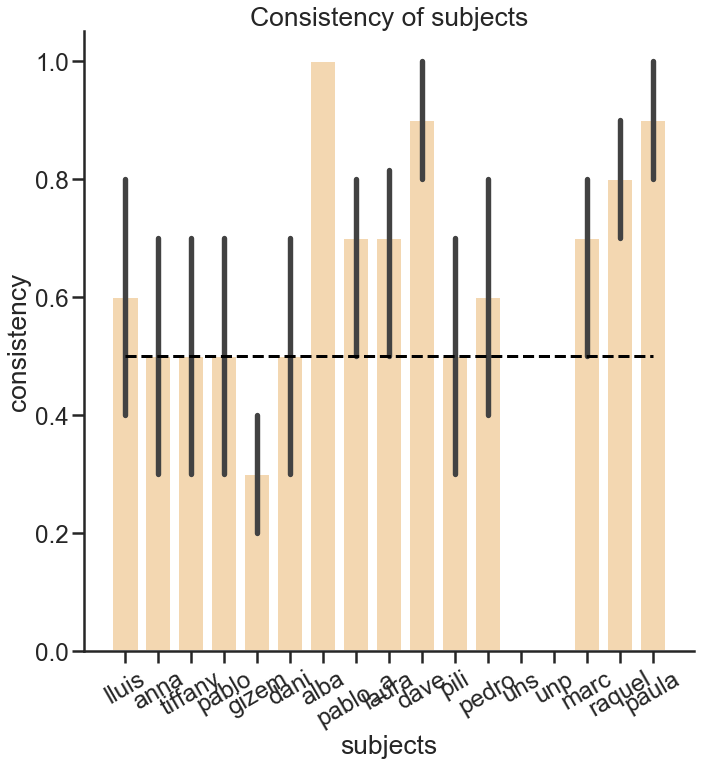

lluis, consistency p_val = 0.754
anna, consistency p_val = 1.0
tiffany, consistency p_val = 1.0
pablo, consistency p_val = 1.0
gizem, consistency p_val = 0.344
dani, consistency p_val = 1.0
alba, consistency p_val = 0.002
pablo_a, consistency p_val = 0.344
laura, consistency p_val = 0.344
dave, consistency p_val = 0.021
pili, consistency p_val = 1.0
pedro, consistency p_val = 0.754
uns, consistency p_val = 0.002
unp, consistency p_val = 0.002
marc, consistency p_val = 0.344
raquel, consistency p_val = 0.109
paula, consistency p_val = 0.021


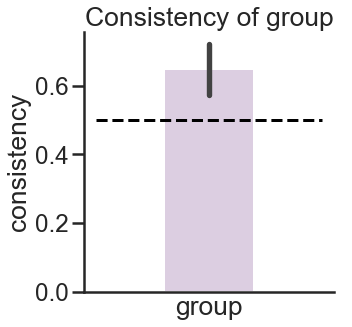

Group consistency p_val = 0.0
N = 15


In [3]:

df['int'] = 1
df['consistency'] =1-  abs( df['blind'] - df['seen'] )

## Subjcet consistency.
g= sns.catplot(x='subj', y='consistency', kind='bar', data=df,  ci=69,  color='#fed9a6', size=10)
g.set_xticklabels(rotation=30)
plt.title('Consistency of subjects')
plt.xlabel('subjects')
plt.plot([0, len(df.subj.unique())-1], [0.5, 0.5], 'k--')
plt.show(block=False)


## Each subject
for subj in df.subj.unique():
    df_s = df.loc[df['subj'] == subj]
    times_consistent = df_s.loc[df.consistency == 1, 'consistency'].count()
    p_val = stats.binom_test(times_consistent, n=len(df_s), p=0.5, alternative='two-sided')
    print( subj + ', consistency p_val = ' + str(round(p_val, 3)))

    

## Population consistency
## Subjcet consistency.
sns.catplot(x='int', y='consistency', kind='bar', data=df, color= '#decbe4')
plt.plot([-1, 1], [0.5, 0.5], 'k--')
plt.tick_params(axis='x',  which='both', bottom=False,  top=False,  labelbottom=False) 
plt.xlabel('group')
plt.title('Consistency of group')
plt.show(block=False)

#As a group
times_consistent = df.loc[df.consistency == 1, 'consistency'].count()
p_val = stats.binom_test(times_consistent, n=len(df) - 2*10, p=0.5, alternative='two-sided')

print( 'Group consistency p_val = ' + str(round(p_val, 3)))
###
print('N = ' + str(len(df.subj.unique() ) -2 ) )
#print( 'No one is performing above chance')

## 2. Are all beers the same?


In [4]:
## Count the decision of each beer per subject in both the blind and seen condition!

order_list = [ 'heineken_0', 'cruzcampo',  'damm',  'galicia', 'heineken' ]

beers=[]
counts = []
subjects=[]
condition=[]

for s in df.subj.unique(): #['lluis', 'anna', 'tiffany', 'pablo', 'gizem', 'dani', 'alba',  'pablo_a', 'laura', 'dave', 'pili', 'pedro']:
        df_s = df.loc[df['subj']==s ]
        blind_win = []
        seen_win = []
        for i in range(0, len(df_s)):
            ### blind
            res = df_s['blind'].iloc[i]
            if res == 0:
                blind_win.append(  df_s['beer1'].iloc[i]  )
            elif res==1:
                blind_win.append(  df_s['beer2'].iloc[i]  )

            ### seen
            res_s = df_s['seen'].iloc[i]
            if res_s == 0:
                seen_win.append(  df_s['beer1'].iloc[i]  )
            elif res_s ==1:
                seen_win.append(  df_s['beer2'].iloc[i]  )
            else:
                seen_win.append('none')
            
        ####
        for beer in order_list:
            #blind
            beers.append(beer)
            counts.append( sum( np.array(blind_win) == beer))
            subjects.append(s)
            condition.append('blind')
            #seen
            beers.append(beer)
            if 'none' in seen_win:
                counts.append(np.nan)
            else:
                counts.append( sum( np.array(seen_win) == beer))
            #
            subjects.append(s)
            condition.append('seen')



df_count_subj=pd.DataFrame({'beer':beers, 'counts':counts, 'subj':subjects, 'cond':condition })
df_count_subj.head(100)

df_count_subj.loc[df_count_subj['subj']=='laura']

,beer,cond,counts,subj
80,heineken_0,blind,4.0,laura
81,heineken_0,seen,3.0,laura
82,cruzcampo,blind,0.0,laura
83,cruzcampo,seen,0.0,laura
84,damm,blind,2.0,laura
85,damm,seen,4.0,laura
86,galicia,blind,1.0,laura
87,galicia,seen,2.0,laura
88,heineken,blind,3.0,laura
89,heineken,seen,1.0,laura


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


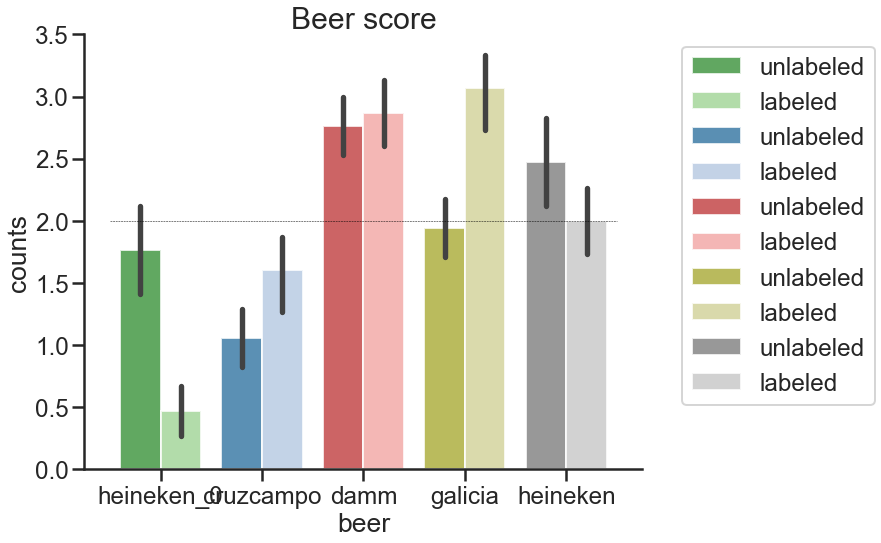

In [5]:
##plot beer score
palettes = [['#2ca02c', '#98df8a' ], ['#1f77b4', '#aec7e8'], [ '#d62728', '#ff9896'],  ['#bcbd22', '#dbdb8d'], ['#7f7f7f', '#c7c7c7' ]]

df_count_subj['cond'] = df_count_subj['cond'].replace(['blind', 'seen'], ['unlabeled', 'labeled'])

fig, ax = pyplot.subplots(figsize=(10,8))

for idx, beer in enumerate(order_list):
    #mean
    sns.catplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']==beer], kind='bar',
                   ci=68, palette= palettes[idx], order=order_list, hue_order=['unlabeled', 'labeled'],  alpha=0.8)
    plt.close()
    
    # subj
    #sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']==beer],
    #               palette= palettes[idx], order=order_list, hue_order=['blind', 'seen'], size=4)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:10], labels[0:10], bbox_to_anchor=(1.05, 1), loc=2)
plt.plot([-0.5, 4.5], [2, 2], 'k--', linewidth=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title('Beer score', size=30);

# pos_i = [-0.2, 0.2 ]

# for idx,beer in enumerate(order_list):
#     colors=palettes[idx]
#     for i, condition in enumerate(['blind', 'seen']):
#         subj_v= df_count_subj.loc[df_count_subj['beer']==beer, 'counts']
#         c=colors[i]
#         pos_x = [idx + pos_i[i] for x in range(0, len(subj_v))]
#         plt.plot( pos_x, subj_v, 'bo', color =c)


df_count_subj['cond'] = df_count_subj['cond'].replace(['unlabeled', 'labeled'], ['blind', 'seen'])


### Beer score by subject

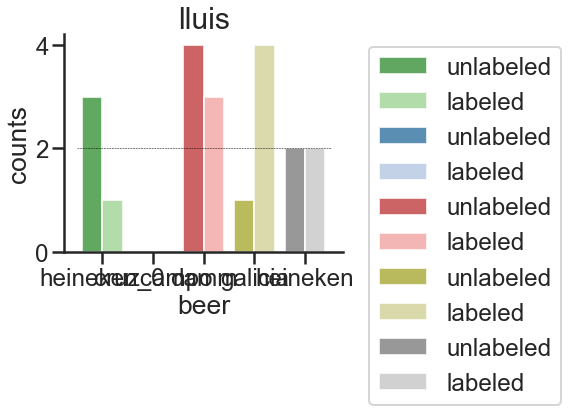

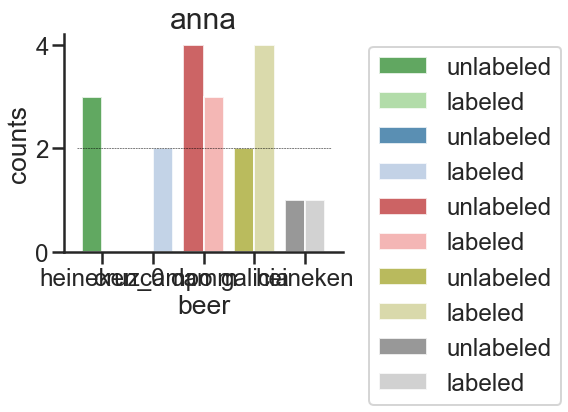

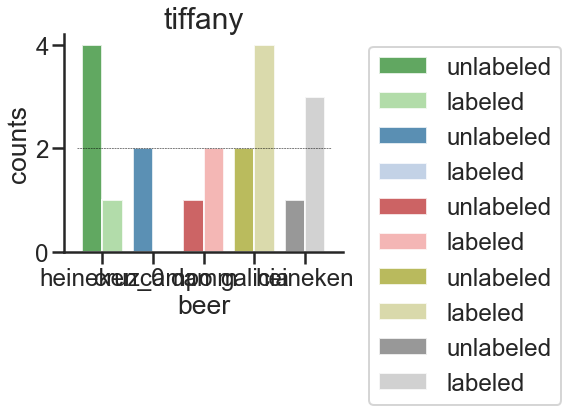

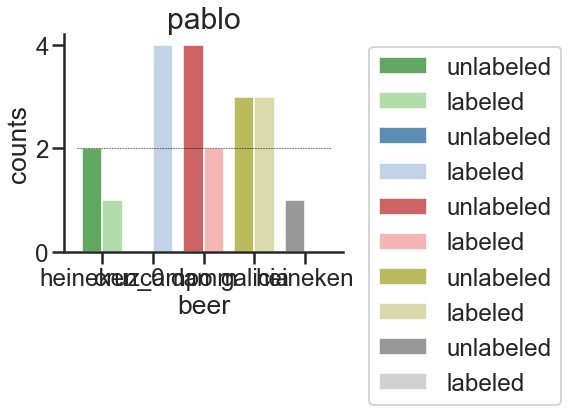

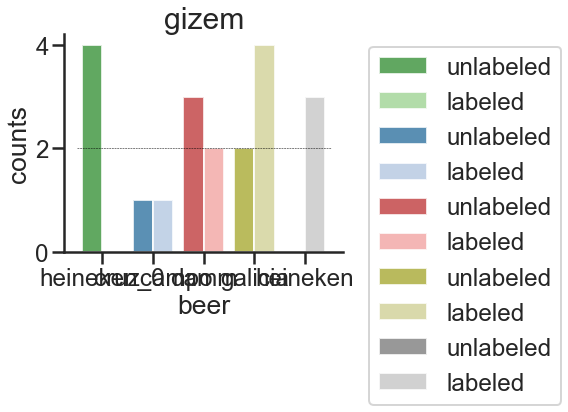

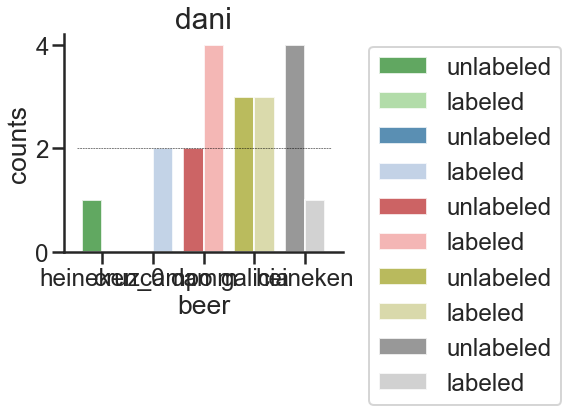

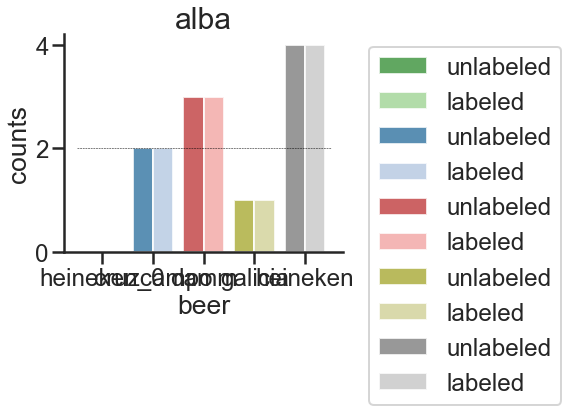

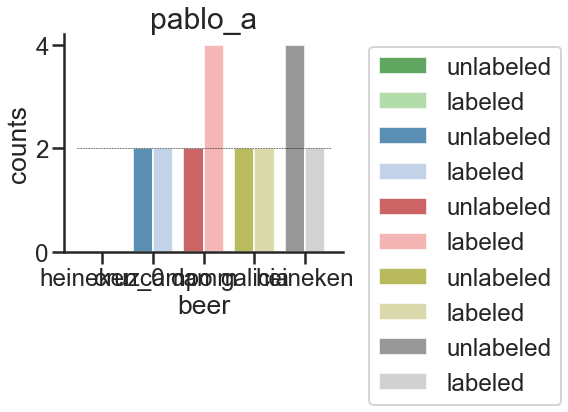

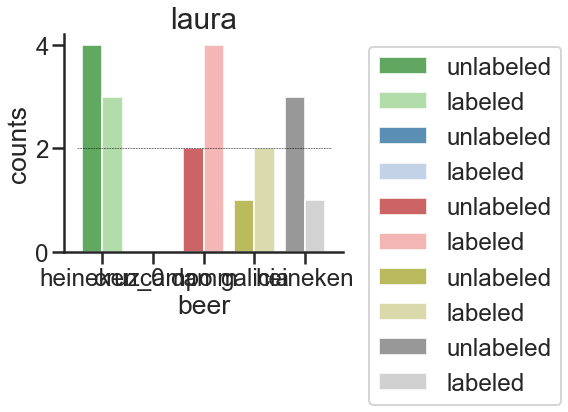

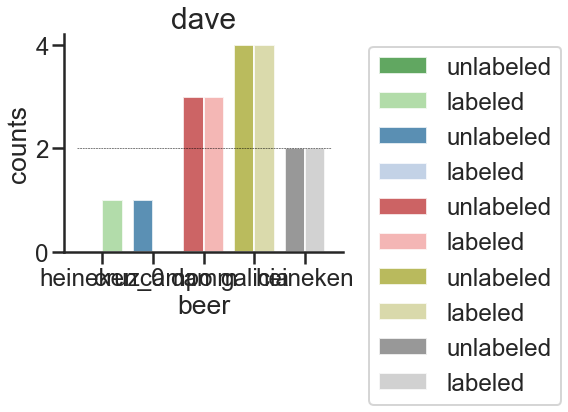

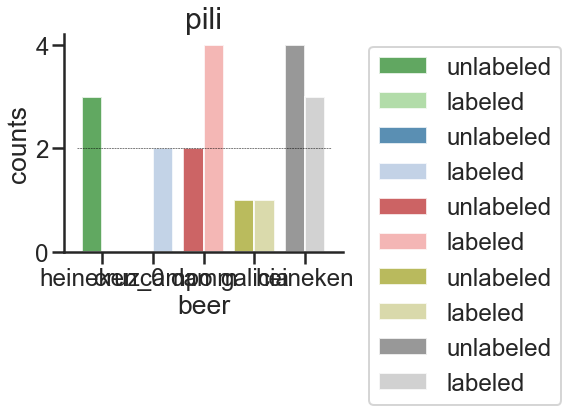

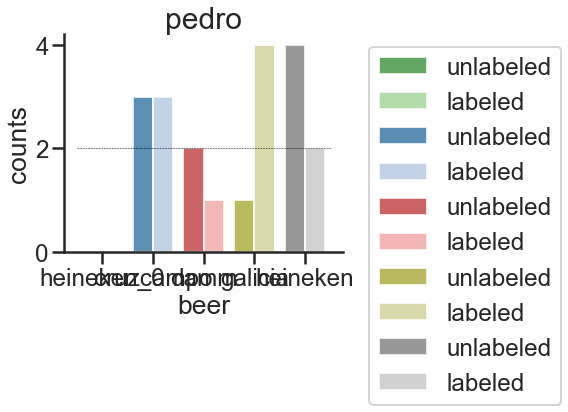

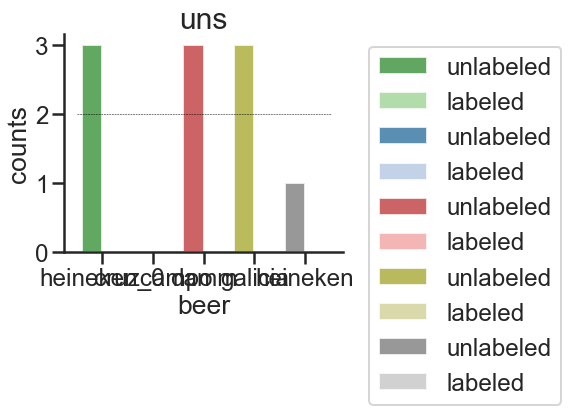

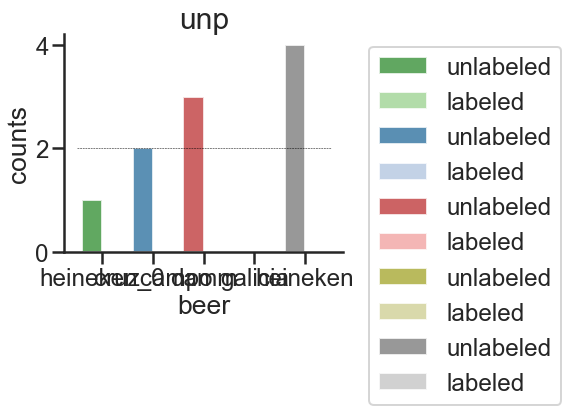

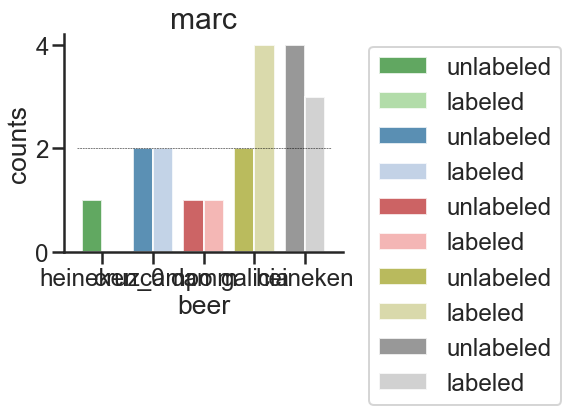

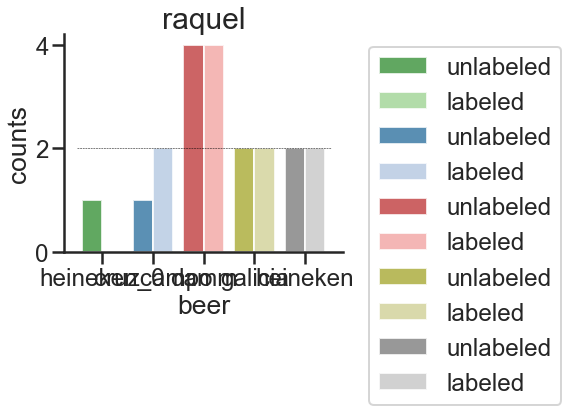

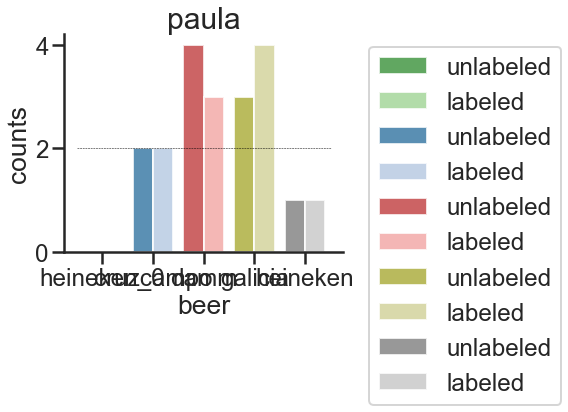

In [6]:
##plot beer score
palettes = [['#2ca02c', '#98df8a' ], ['#1f77b4', '#aec7e8'], [ '#d62728', '#ff9896'],  ['#bcbd22', '#dbdb8d'], ['#7f7f7f', '#c7c7c7' ]]

df_count_subj['cond'] = df_count_subj['cond'].replace(['blind', 'seen'], ['unlabeled', 'labeled'])


for subject in df_count_subj.subj.unique():
    fig, ax = pyplot.subplots(figsize=(5,4))

    for idx, beer in enumerate(order_list):
        #mean
        sns.catplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[(df_count_subj['beer']==beer) & (df_count_subj['subj']==subject) ], kind='bar',
                       ci=68, palette= palettes[idx], order=order_list, hue_order=['unlabeled', 'labeled'],  alpha=0.8)
        plt.close()

        # subj
        #sns.swarmplot(ax=ax, x='beer', y='counts', hue='cond', data=df_count_subj.loc[df_count_subj['beer']==beer],
        #               palette= palettes[idx], order=order_list, hue_order=['blind', 'seen'], size=4)


    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:10], labels[0:10], bbox_to_anchor=(1.05, 1), loc=2)
    plt.plot([-0.5, 4.5], [2, 2], 'k--', linewidth=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.title( subject, size=30);
    plt.show(block=False)

    # pos_i = [-0.2, 0.2 ]

    # for idx,beer in enumerate(order_list):
    #     colors=palettes[idx]
    #     for i, condition in enumerate(['blind', 'seen']):
    #         subj_v= df_count_subj.loc[df_count_subj['beer']==beer, 'counts']
    #         c=colors[i]
    #         pos_x = [idx + pos_i[i] for x in range(0, len(subj_v))]
    #         plt.plot( pos_x, subj_v, 'bo', color =c)



    
    
df_count_subj['cond'] = df_count_subj['cond'].replace(['unlabeled', 'labeled'], ['blind', 'seen'])


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


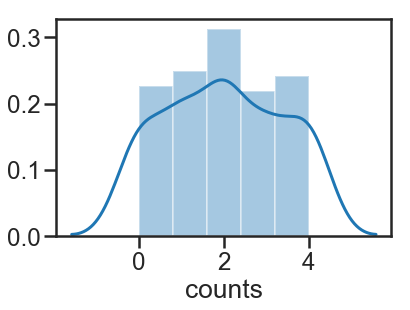

NormaltestResult(statistic=62.562908050615604, pvalue=2.59798794104838e-14)
Test normality: Non-parametric statistics


--------------------------------


Non-Parametric tests
--------------------------------

heineken_0, blind p_val = 0.502
damm, blind p_val = 0.016
heineken, blind p_val = 0.126
galicia, blind p_val = 0.924
cruzcampo, blind p_val = 0.001

Damm is objectively better
Cruzcampo is objectively worse


heineken_0, seen p_val = 0.0
damm, seen p_val = 0.01
heineken, seen p_val = 1.0
galicia, seen p_val = 0.002
cruzcampo, seen p_val = 0.261


Heineken 0  is subjectively worse
Damm  is subjectively better
Galicia  is subjectively better




In [7]:
sns.distplot(df_count_subj.loc[df_count_subj['counts']>-1, 'counts'], bins=5)
plt.show()
print(stats.normaltest(df_count_subj.loc[df_count_subj['counts']>-1, 'counts']))
print( 'Test normality: Non-parametric statistics')
print('')
print('')
print('--------------------------------')


# print('Parametric tests')
# print('--------------------------------')
# print('')

# #### Ttest comparing to the expected, in this case by chance you would get 2.


# for beer in df_count_subj.beer.unique():
#     p_blind = df_count_subj.loc[(df_count_subj['beer']==beer) & (df_count_subj['cond']=='blind') , 'counts'].values
#     t, p_val = stats.ttest_1samp(p_blind, 2)
#     print( beer + ', blind p_val = ' + str(round(p_val, 3)))
    
# ##
# print('')
# print( 'Damm is objectively better')
# print( 'Cruzcampo is objectively worse')
# print('')
# print('')
# print('--------------------------------')
# print('')

# for beer in df_count_subj.beer.unique():
#     p_seen = df_count_subj.loc[(df_count_subj['beer']==beer) & (df_count_subj['cond']=='seen') , 'counts'].values
#     p_seen = p_seen[~np.isnan(p_seen)]
#     t, p_val = stats.ttest_1samp(p_seen, 2)
#     print( beer + ', seen p_val = ' + str(round(p_val, 3)))
    
# ##
# print('')
# print( 'Heineken 0  is subjectively worse')
# print( 'Damm  is subjectively better')
# print( 'Galicia  is subjectively better')


print('')
print('')
print('Non-Parametric tests')
print('--------------------------------')
print('')

### Binomial test!
##Option 1
## Is Heineken better than the others?
## I have 5 beers. If all are equally good, they should win 20% of the times each. By chance --> p=0.20
## 30 people --> 300 tests 
#print(stats.binom_test(58, n=300, p=0.20, alternative='two-sided'))

##Option 2
## Is Heineken better than the others?
## I have 5 beers. Heineken participated in 4*N = 4*30 subj = 120 tests 1vs 1.
## If heinezen is better, p>0.5 --> p=0.5
#print(stats.binom_test(58, n=120, p=0.5, alternative='two-sided'))

blind_win=[]
seen_win=[]

for i in range(0, len(df)):
    ### blind
    res = df['blind'].iloc[i]
    if res == 0:
        blind_win.append(  df['beer1'].iloc[i]  )
    elif res==1:
        blind_win.append(  df['beer2'].iloc[i]  )
    
    ### seen
    res_s = df['seen'].iloc[i]
    if res_s == 0:
        seen_win.append(  df['beer1'].iloc[i]  )
    elif res_s ==1:
        seen_win.append(  df['beer2'].iloc[i]  )
    else:
        seen_win.append(np.nan)
    

df['blind_win'] = blind_win
df['seen_win'] = seen_win 

beers=[]
counts_b=[]
counts_s=[]
for beer in df['blind_win'].unique():
    beers.append(beer)
    counts_b.append( df.loc[df.blind_win == beer, 'blind_win'].count())
    counts_s.append( df.loc[df.seen_win == beer, 'seen_win'].count())


##   
df_b = pd.DataFrame({ 'beer':beers, 'counts': counts_b}) 
df_b['condition'] = 'blind'
#
df_s = pd.DataFrame({ 'beer':beers, 'counts': counts_s}) 
df_s['condition'] = 'seen'

df_bs = pd.DataFrame({ 'beer':beers, 'counts_b': counts_b, 'counts_s': counts_s}) 

####

for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_b']  , n=df_bs['counts_b'].sum(), p=0.20, alternative='two-sided')
    print( beer + ', blind p_val = ' + str(round(p_val, 3)))

#
print('')
print( 'Damm is objectively better')
print( 'Cruzcampo is objectively worse')
print('')
print('')



for beer in df_bs.beer.unique():
    p_val = stats.binom_test( df_bs.loc[df_bs['beer']==beer, 'counts_s']  , n=df_bs['counts_s'].sum(), p=0.20, alternative='two-sided')
    print( beer + ', seen p_val = ' + str(round(p_val, 3)))

#
print('')
print('')
print( 'Heineken 0  is subjectively worse')
print( 'Damm  is subjectively better')
print( 'Galicia  is subjectively better')
print('')
print('')


### Correlation seen - blind

SpearmanrResult(correlation=0.35440525413462337, pvalue=0.001810878487029556)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


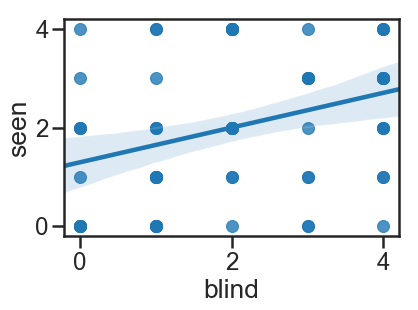

In [8]:
blind_values = df_count_subj.loc[df_count_subj['cond']=='blind'].counts.values
seen_values = df_count_subj.loc[df_count_subj['cond']=='seen'].counts.values

df_corr = pd.DataFrame({'blind':blind_values, 'seen':seen_values})
values_blind = df_corr['blind'][~df_corr['seen'].isna()]
values_seen = df_corr['seen'][~df_corr['seen'].isna()]

#print(stats.pearsonr(values_seen, values_blind) )
sns.regplot(x='blind', y='seen', data=df_corr)

print(stats.spearmanr(values_seen, values_blind) )


### Correlation seen - blind by beer

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


SpearmanrResult(correlation=0.4081036668693866, pvalue=0.131014573015786)
SpearmanrResult(correlation=0.172812301527902, pvalue=0.5379624968757157)
SpearmanrResult(correlation=0.11165048543689321, pvalue=0.6919953273305235)
SpearmanrResult(correlation=0.32972523826251365, pvalue=0.2300766832612181)
SpearmanrResult(correlation=0.26189164683724664, pvalue=0.3457275581202327)


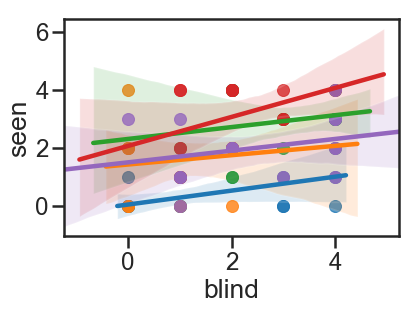

In [9]:
for beer in df_count_subj.beer.unique():
    blind_values = df_count_subj.loc[(df_count_subj['cond']=='blind') & (df_count_subj['beer']==beer) ].counts.values
    seen_values = df_count_subj.loc[(df_count_subj['cond']=='seen') & (df_count_subj['beer']==beer)].counts.values

    df_corr = pd.DataFrame({'blind':blind_values, 'seen':seen_values})
    values_blind = df_corr['blind'][~df_corr['seen'].isna()]
    values_seen = df_corr['seen'][~df_corr['seen'].isna()]

    #print(stats.pearsonr(values_seen, values_blind) )
    sns.regplot(x='blind', y='seen', data=df_corr)

    print(stats.spearmanr(values_seen, values_blind) )

## 3. Is a beer socially over or under rated?
####  Social overrating and underrating 
##### (+ is social overrating and - social underrating, 0 means social rating reflects reality)

In [10]:
df_diff = df_count_subj.loc[df_count_subj['cond']=='blind', ['cond', 'subj', 'beer']].copy()
values_diff = df_count_subj.loc[df_count_subj['cond']=='seen']['counts'].values- df_count_subj.loc[df_count_subj['cond']=='blind']['counts'].values
df_diff['cond']='diff'
df_diff['Overrating']=values_diff
df_diff = df_diff[~np.isnan(df_diff['Overrating'])]
df_diff = df_diff.reset_index()
df_diff

,index,cond,subj,beer,Overrating
0,0,diff,lluis,heineken_0,-2.0
1,2,diff,lluis,cruzcampo,0.0
2,4,diff,lluis,damm,-1.0
3,6,diff,lluis,galicia,3.0
4,8,diff,lluis,heineken,0.0
5,10,diff,anna,heineken_0,-3.0
6,12,diff,anna,cruzcampo,2.0
7,14,diff,anna,damm,-1.0
8,16,diff,anna,galicia,2.0
9,18,diff,anna,heineken,0.0


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


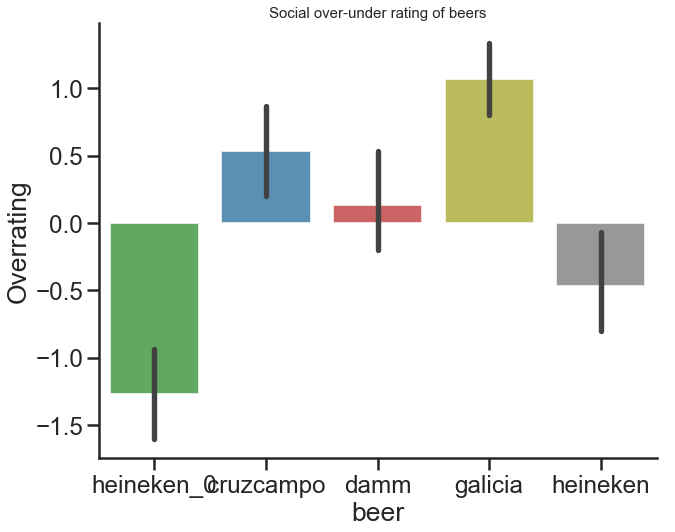

In [11]:
fig, ax = pyplot.subplots(figsize=(10,8))

sns.catplot(ax=ax, x='beer', y='Overrating', data=df_diff, kind='bar', order=order_list, ci=68, 
               palette=['#2ca02c', '#1f77b4', '#d62728', '#bcbd22',  '#7f7f7f'],  alpha=0.8)
plt.close()

# sns.swarmplot(ax=ax, x='beer', y='Overrating', data=df_diff, order=order_list, 
#                palette=['#2ca02c', '#1f77b4', '#d62728', '#bcbd22',  '#7f7f7f'], alpha=0.8, size=4)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.title('Social over-under rating of beers', size=15)
plt.show()



No handles with labels found to put in legend.


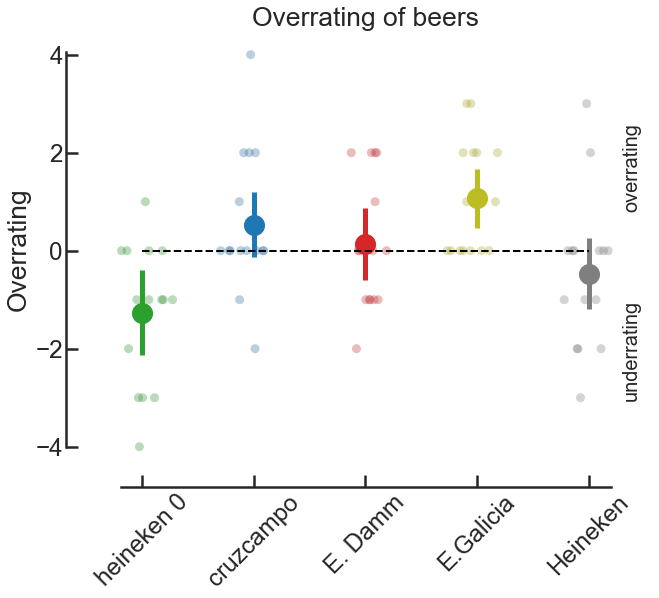

In [103]:
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")


plt.figure(figsize=(10,8))
linares_plot( x='beer', y='Overrating', df=df_diff,  order=order_list, CI=0.95, 
             palette=['#2ca02c', '#1f77b4', '#d62728', '#bcbd22',  '#7f7f7f'],  
             alpha=0.34, MS=20, LW=5, point_size=9, plot_box='mean')
plt.plot([0,4], [0,0], 'k--', linewidth=2)
plt.title('Overrating of beers');
plt.xticks([0,1,2,3,4], ['heineken 0', 'cruzcampo', 'E. Damm', 'E.Galicia', 'Heineken'], rotation=45);
plt.xlabel('');
plt.text(4.3, 2.3, 'overrating', fontsize=20, rotation='vertical');
plt.text(4.3, -1.3, 'underrating', fontsize=20, rotation='vertical');






In [104]:
df_diff

,index,cond,subj,beer,Overrating
0,0,diff,lluis,heineken_0,-2.0
1,2,diff,lluis,cruzcampo,0.0
2,4,diff,lluis,damm,-1.0
3,6,diff,lluis,galicia,3.0
4,8,diff,lluis,heineken,0.0
5,10,diff,anna,heineken_0,-3.0
6,12,diff,anna,cruzcampo,2.0
7,14,diff,anna,damm,-1.0
8,16,diff,anna,galicia,2.0
9,18,diff,anna,heineken,0.0


In [ ]:
sns.distplot(df_diff['Overrating'])
plt.show()
print(stats.normaltest(df_diff['Overrating']))
print( 'Test normality: Parametric statistics')
print('')
print('--------------------------------')

### It is the way to compare with itself
#### Blind / N is the expected p
#### Seen is the expected 

print('')
print('Parametric tests')
print('--------------------------------')
print('')

for beer in df_diff.beer.unique():
    p_blind = df_diff.loc[df_diff['beer']==beer, 'Overrating'].values
    t, p_val = stats.ttest_1samp(p_blind, 0)
    print( beer + ', diff p_val = ' + str(round(p_val, 3)))
    
##
print('')
print('')
print( 'Heineken 0 is under rated')
print( 'Estrella Galicia is over rated')


# print('')
# print('')
# print('Non-Parametric tests')
# print('--------------------------------')
# print('')
# df2 = df[~np.isnan(df['seen'])]

# beers=[]
# counts_b=[]
# counts_s=[]
# for beer in df2['blind_win'].unique():
#     beers.append(beer)
#     counts_b.append( df2.loc[df.blind_win == beer, 'blind_win'].count())
#     counts_s.append( df2.loc[df.seen_win == beer, 'seen_win'].count())


# ##   
# df_b = pd.DataFrame({ 'beer':beers, 'counts': counts_b}) 
# df_b['condition'] = 'blind'
# #
# df_s = pd.DataFrame({ 'beer':beers, 'counts': counts_s}) 
# df_s['condition'] = 'seen'

# df_bs = pd.DataFrame({ 'beer':beers, 'counts_b': counts_b, 'counts_s': counts_s}) 


# for beer in df_bs.beer.unique():
#     p_blind = df_bs.loc[df_bs['beer']==beer, 'counts_b']/len(df2)
#     p_blind = p_blind.values[0]
#     f_seen = df_bs.loc[df_bs['beer']==beer, 'counts_s'].values[0]   
#     p_val = stats.binom_test( f_seen , n=len(df2), p= p_blind, alternative='two-sided')
#     print( beer + ', diff p_val = ' + str(round(p_val, 3)))
    
# ##
# print('')
# print('')
# print( 'Heineken 0 is under rated')
# print( 'Estrella Galicia is over rated')
# print( 'Cruzcampo is over rated')
